<a href="https://colab.research.google.com/github/julianl11/projektarbeit_1/blob/main/pytorch_course/02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
 import sklearn
from sklearn.datasets import make_circles

In [300]:
n_samples = 1000

X,y = make_circles(n_samples=n_samples, noise=0.03, factor=0.5, random_state=42)

len(X), len(y)

(1000, 1000)

In [301]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.46463176  0.15322829]
 [-0.4601531   0.10446773]
 [-0.51775752  0.13568206]
 [-0.26599694  0.42143465]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [302]:
import pandas

In [303]:
circles_df = pandas.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "y": y[:]})
circles_df.head()

,X1,X2,y
0,0.464632,0.153228,1
1,-0.460153,0.104468,1
2,-0.517758,0.135682,1
3,-0.265997,0.421435,1
4,0.442208,-0.896723,0


In [304]:
import matplotlib.pyplot as plt

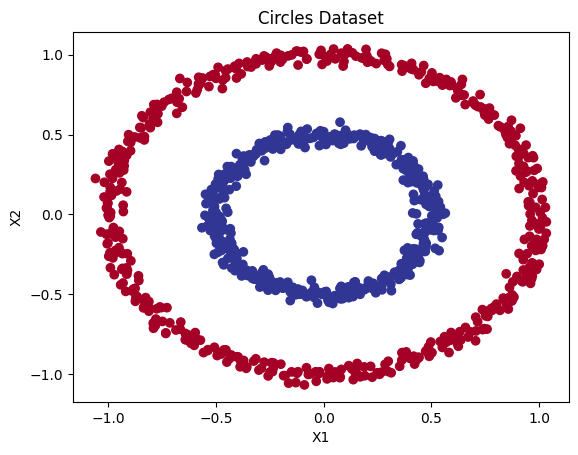

In [305]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Circles Dataset")
plt.show()

# Check input and output

In [306]:
X.shape, y.shape

((1000, 2), (1000,))

In [307]:
X_sample = X[0]
y_sample = y[0]

print(f"X: {X_sample}, y: {y_sample}")
print(f"X: {X_sample.shape}, y: {y_sample.shape}")

X: [0.46463176 0.15322829], y: 1
X: (2,), y: ()


In [308]:
import torch
print(torch.__version__)

2.6.0+cu124


In [309]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [310]:
type(X)

torch.Tensor

In [311]:
X[:5]

tensor([[ 0.4646,  0.1532],
        [-0.4602,  0.1045],
        [-0.5178,  0.1357],
        [-0.2660,  0.4214],
        [ 0.4422, -0.8967]])

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=33)

In [314]:
len(X_train), len(X_test)

(800, 200)

In [315]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [316]:
class CircleModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.linear_layer_1 = nn.Linear(in_features=2, out_features=5)
    self.linear_layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x: torch.Tensor):

    return self.linear_layer_2((self.linear_layer_1(x)))



In [317]:
model = CircleModel().to(device)
model

CircleModel(
  (linear_layer_1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [318]:
next(model.parameters())

Parameter containing:
tensor([[ 0.4907, -0.5682],
        [-0.1750, -0.1252],
        [-0.0607, -0.0532],
        [-0.1512,  0.2486],
        [ 0.6154, -0.4557]], device='cuda:0', requires_grad=True)

In [319]:
model_sequential = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=2)
)
print(model_sequential)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=2, bias=True)
)


In [320]:
model.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[ 0.4907, -0.5682],
                      [-0.1750, -0.1252],
                      [-0.0607, -0.0532],
                      [-0.1512,  0.2486],
                      [ 0.6154, -0.4557]], device='cuda:0')),
             ('linear_layer_1.bias',
              tensor([-0.3287, -0.5297,  0.1011,  0.1008,  0.3566], device='cuda:0')),
             ('linear_layer_2.weight',
              tensor([[-0.2761, -0.1994, -0.2896, -0.1993, -0.1069]], device='cuda:0')),
             ('linear_layer_2.bias', tensor([-0.1235], device='cuda:0'))])

In [321]:
with torch.inference_mode():
  untrained_preds = model(X_test.to(device))
print(f"Length of preds: {len(untrained_preds)} and shape {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)} and shape {y_test.unsqueeze(dim=1).shape}  ")

Length of preds: 200 and shape torch.Size([200, 1])
Length of test samples: 200 and shape torch.Size([200, 1])  


In [322]:
y_test.unsqueeze(dim=1)[:10], untrained_preds[:10]

(tensor([[0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.]]),
 tensor([[-0.1699],
         [-0.0216],
         [-0.1172],
         [-0.2432],
         [ 0.2047],
         [-0.0351],
         [-0.0817],
         [-0.2060],
         [-0.0415],
         [-0.0135]], device='cuda:0'))

In [323]:
X_train[:10], y_train[:10]

(tensor([[ 0.9859, -0.0592],
         [ 1.0005, -0.3119],
         [-0.1628, -1.0567],
         [-0.3379, -0.3772],
         [-0.9720,  0.3617],
         [ 0.2593, -1.0015],
         [ 0.2998,  0.4528],
         [ 0.3661, -0.3449],
         [-0.4697,  0.1980],
         [ 0.1170, -0.4774]]),
 tensor([0., 0., 0., 1., 0., 0., 1., 1., 1., 1.]))

# loss & optimizer

In [324]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [325]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [326]:
model.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[ 0.4907, -0.5682],
                      [-0.1750, -0.1252],
                      [-0.0607, -0.0532],
                      [-0.1512,  0.2486],
                      [ 0.6154, -0.4557]], device='cuda:0')),
             ('linear_layer_1.bias',
              tensor([-0.3287, -0.5297,  0.1011,  0.1008,  0.3566], device='cuda:0')),
             ('linear_layer_2.weight',
              tensor([[-0.2761, -0.1994, -0.2896, -0.1993, -0.1069]], device='cuda:0')),
             ('linear_layer_2.bias', tensor([-0.1235], device='cuda:0'))])

In [327]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_train.to(device))
y_logits[:5]

tensor([[-0.1432],
        [-0.1946],
        [-0.2029],
        [-0.0486],
        [ 0.1718]], device='cuda:0')

In [328]:
y_preds_prob = torch.sigmoid(y_logits)
y_preds_prob[:5]

tensor([[0.4643],
        [0.4515],
        [0.4495],
        [0.4879],
        [0.5428]], device='cuda:0')

In [329]:
y_preds = torch.round(y_preds_prob)[:5]

y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device))[:5]))
print(torch.eq(y_preds, y_pred_labels.squeeze()))
#

tensor([[ True,  True,  True,  True, False],
        [ True,  True,  True,  True, False],
        [ True,  True,  True,  True, False],
        [ True,  True,  True,  True, False],
        [False, False, False, False,  True]], device='cuda:0')


In [330]:
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train) # BCEWithLogitsLoss !

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred= test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Test Loss: {test_loss} | Test Acc: {test_acc:.5f}%")


Epoch: 0 | Test Loss: 0.6900863647460938 | Test Acc: 57.50000%
Epoch: 10 | Test Loss: 0.6978896856307983 | Test Acc: 60.00000%
Epoch: 20 | Test Loss: 0.7016928791999817 | Test Acc: 59.50000%
Epoch: 30 | Test Loss: 0.6993220448493958 | Test Acc: 57.50000%
Epoch: 40 | Test Loss: 0.6997549533843994 | Test Acc: 58.50000%
Epoch: 50 | Test Loss: 0.6995694637298584 | Test Acc: 61.50000%
Epoch: 60 | Test Loss: 0.699554443359375 | Test Acc: 61.50000%
Epoch: 70 | Test Loss: 0.6994500756263733 | Test Acc: 61.00000%
Epoch: 80 | Test Loss: 0.6994901895523071 | Test Acc: 61.50000%
Epoch: 90 | Test Loss: 0.6995886564254761 | Test Acc: 61.50000%


In [331]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  print(request.status_code)
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists


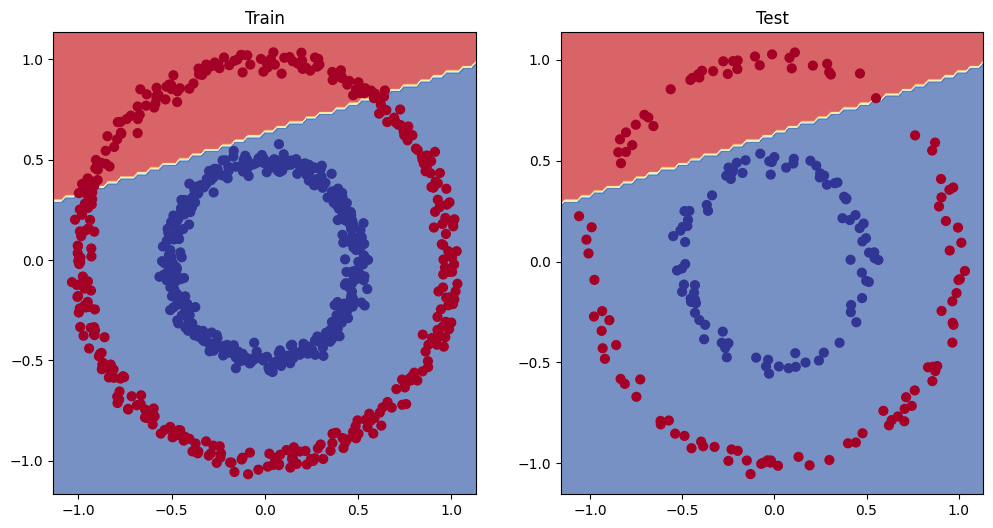

In [332]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [333]:
model.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[ 0.4327, -0.4069],
                      [-0.1906,  0.0423],
                      [-0.0714,  0.1143],
                      [-0.1467,  0.4042],
                      [ 0.4981, -0.2981]])),
             ('linear_layer_1.bias',
              tensor([-0.3757, -0.5681,  0.0468,  0.0547,  0.3046])),
             ('linear_layer_2.weight',
              tensor([[-0.1394, -0.1775, -0.1040, -0.3091,  0.0005]])),
             ('linear_layer_2.bias', tensor([-0.0760]))])

In [334]:
model

CircleModel(
  (linear_layer_1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [335]:
class CircleModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.linear_layer_1 = nn.Linear(in_features=2, out_features=10)
    self.linear_layer_2 = nn.Linear(in_features=10, out_features=10)
    self.linear_layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor):

    return self.linear_layer_3((self.linear_layer_2(self.linear_layer_1(x))))



In [336]:
model_3 = CircleModel()
model_3

CircleModel(
  (linear_layer_1): Linear(in_features=2, out_features=10, bias=True)
  (linear_layer_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [337]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)

In [338]:
epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [339]:
model_3.to(device)

CircleModel(
  (linear_layer_1): Linear(in_features=2, out_features=10, bias=True)
  (linear_layer_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [340]:
for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Test Loss: {test_loss} | Test Acc: {test_acc:.5f}%")

Epoch: 0 | Test Loss: 0.730154275894165 | Test Acc: 44.50000%
Epoch: 10 | Test Loss: 0.7264004349708557 | Test Acc: 44.50000%
Epoch: 20 | Test Loss: 0.723098635673523 | Test Acc: 44.50000%
Epoch: 30 | Test Loss: 0.7201852202415466 | Test Acc: 44.50000%
Epoch: 40 | Test Loss: 0.7176064848899841 | Test Acc: 44.50000%
Epoch: 50 | Test Loss: 0.7153177261352539 | Test Acc: 44.50000%
Epoch: 60 | Test Loss: 0.7132812142372131 | Test Acc: 44.50000%
Epoch: 70 | Test Loss: 0.7114648222923279 | Test Acc: 44.50000%
Epoch: 80 | Test Loss: 0.7098411917686462 | Test Acc: 44.50000%
Epoch: 90 | Test Loss: 0.7083871364593506 | Test Acc: 44.50000%


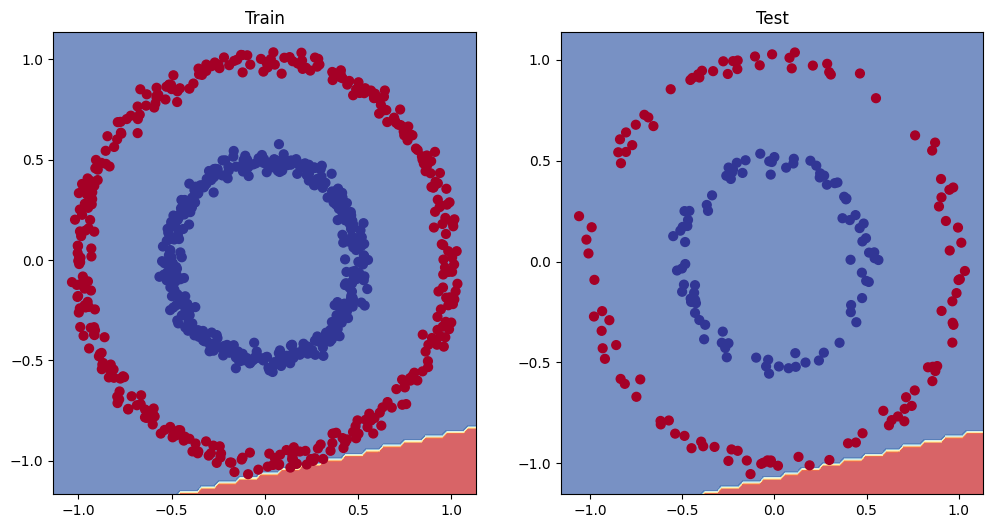

In [341]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [342]:
w = 2
b = 0.125
X = torch.arange(1, 10, 0.2).unsqueeze(dim=1)
y = w * X + b
print(X[:5], y[:5])

tensor([[1.0000],
        [1.2000],
        [1.4000],
        [1.6000],
        [1.8000]]) tensor([[2.1250],
        [2.5250],
        [2.9250],
        [3.3250],
        [3.7250]])


In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [344]:
X_train, y_train

(tensor([[1.6000],
         [6.2000],
         [4.6000],
         [1.4000],
         [6.6000],
         [8.2000],
         [8.6000],
         [8.4000],
         [9.8000],
         [4.2000],
         [9.6000],
         [9.4000],
         [5.2000],
         [1.2000],
         [3.2000],
         [2.8000],
         [7.6000],
         [6.4000],
         [2.4000],
         [7.0000],
         [4.4000],
         [8.0000],
         [5.0000],
         [3.6000],
         [9.2000],
         [4.8000],
         [7.8000],
         [3.8000],
         [1.0000],
         [2.0000],
         [3.0000],
         [5.8000],
         [3.4000],
         [6.0000],
         [5.4000],
         [9.0000]]),
 tensor([[ 3.3250],
         [12.5250],
         [ 9.3250],
         [ 2.9250],
         [13.3250],
         [16.5250],
         [17.3250],
         [16.9250],
         [19.7250],
         [ 8.5250],
         [19.3250],
         [18.9250],
         [10.5250],
         [ 2.5250],
         [ 6.5250],
         [ 5.7

In [345]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

In [346]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [347]:
for epoch in range(epochs):
  model_2.train()

  y_preds = model_2(X_train)
  #print(y_preds, y_train)
  loss = loss_fn(y_preds, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()

  with torch.inference_mode():

    test_preds = model_2(X_test)
    test_loss = loss_fn(test_preds, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Test Loss: {test_loss}")

Epoch: 0 | Test Loss: 9.156373023986816
Epoch: 10 | Test Loss: 1.155606746673584
Epoch: 20 | Test Loss: 1.6575937271118164
Epoch: 30 | Test Loss: 2.1366608142852783
Epoch: 40 | Test Loss: 1.8869802951812744
Epoch: 50 | Test Loss: 0.40325286984443665
Epoch: 60 | Test Loss: 1.3047410249710083
Epoch: 70 | Test Loss: 1.2546629905700684
Epoch: 80 | Test Loss: 0.7484148740768433
Epoch: 90 | Test Loss: 1.7497944831848145


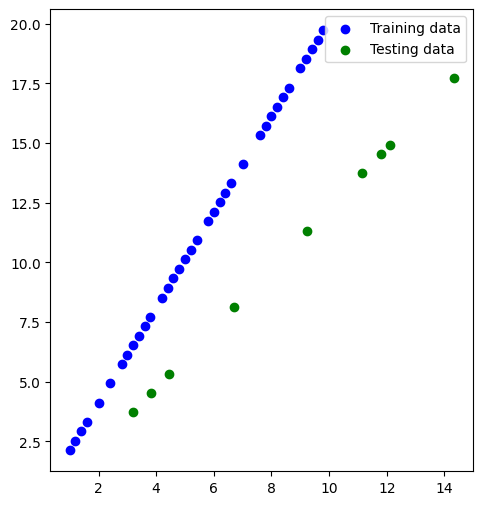

In [348]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(test_preds, y_test, c="g", label="Testing data")
plt.legend()

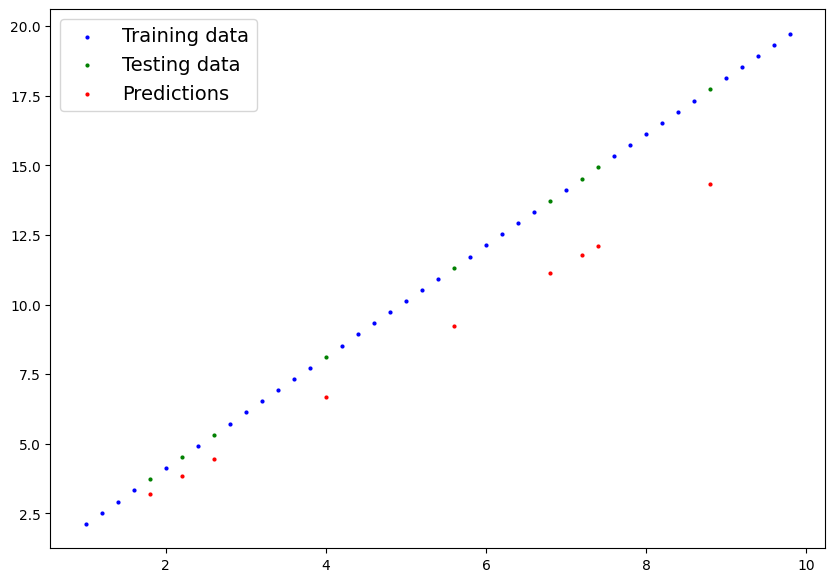

In [349]:
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test)

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [350]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


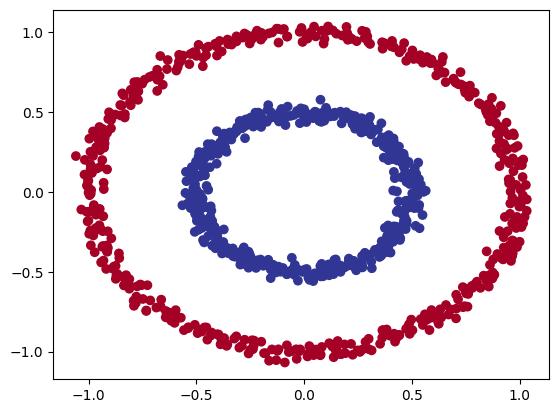

In [351]:
n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, factor=0.5, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [352]:
type(X)

torch.Tensor

In [353]:
class CircleModelV2(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor):
    return self.layer_2(self.relu(self.layer_1(x)))

In [354]:
model_4 = CircleModelV2()
model_4

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [355]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_4.parameters(), lr=0.01)

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [357]:
epochs = 1000

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_train, y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Test Loss: {test_loss} | Test Acc: {test_acc:.5f}%")

Epoch: 0 | Test Loss: 0.6856437921524048 | Test Acc: 53.50000%
Epoch: 100 | Test Loss: 0.48297345638275146 | Test Acc: 93.00000%
Epoch: 200 | Test Loss: 0.2290152907371521 | Test Acc: 100.00000%
Epoch: 300 | Test Loss: 0.15060575306415558 | Test Acc: 100.00000%
Epoch: 400 | Test Loss: 0.11338213086128235 | Test Acc: 100.00000%
Epoch: 500 | Test Loss: 0.09125753492116928 | Test Acc: 100.00000%
Epoch: 600 | Test Loss: 0.07643334567546844 | Test Acc: 100.00000%
Epoch: 700 | Test Loss: 0.06559624522924423 | Test Acc: 100.00000%
Epoch: 800 | Test Loss: 0.057271670550107956 | Test Acc: 100.00000%
Epoch: 900 | Test Loss: 0.05061114951968193 | Test Acc: 100.00000%


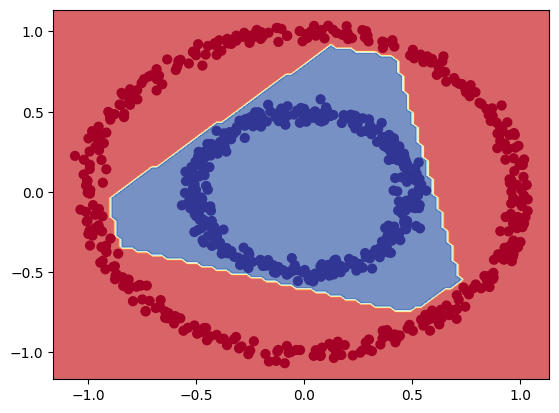

In [358]:
plot_decision_boundary(model_4, X_train, y_train)

In [359]:
test_logits.shape, y_test.shape

(torch.Size([200]), torch.Size([200]))

In [360]:
A = torch.arange(-10, 10, 1., dtype=torch.float32)
A.dtype

torch.float32

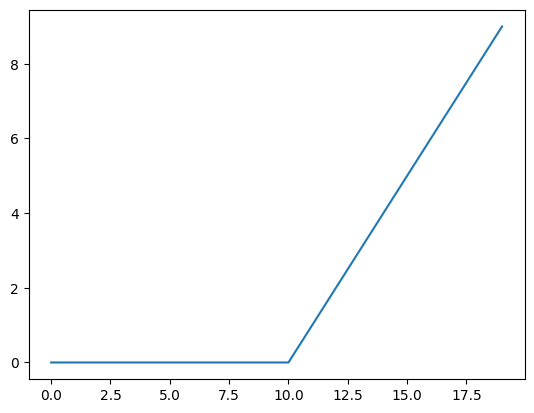

In [361]:
plt.plot(torch.relu(A))

In [362]:
def relu(x: torch.Tensor):
  return torch.max(torch.tensor(0.), x)

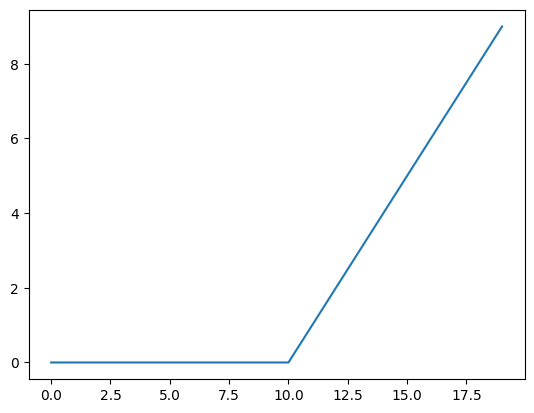

In [363]:
custom_relu = plt.plot(relu(A))
custom_relu

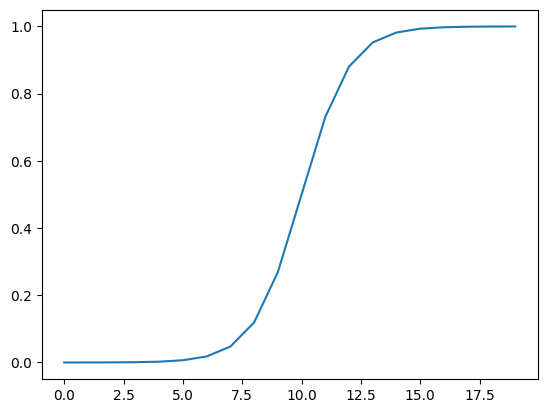

In [364]:
plt.plot(torch.sigmoid(A))

In [365]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [366]:
X_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers = 4, cluster_std=1.5, random_state=42)


In [367]:
X_blob.shape, y_blob.shape, X_blob[:5], y_blob[:5]

((1000, 2),
 (1000,),
 array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475]]),
 array([3, 2, 2, 1, 1]))

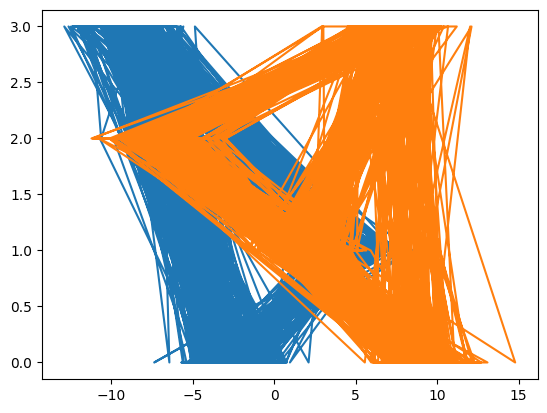

In [368]:
plt.plot(X_blob, y_blob)


In [369]:
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.float32)

In [370]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=42)

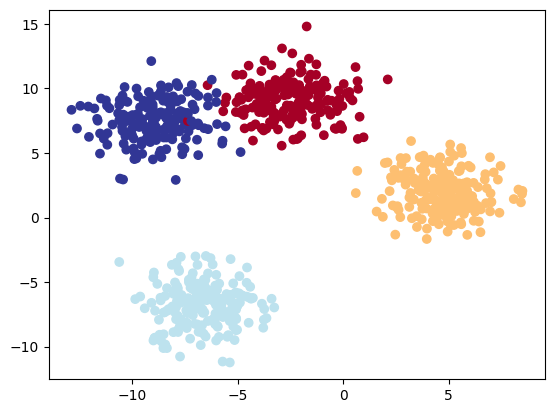

In [371]:
plt.scatter(X_blob_train[:, 0], X_blob_train[:, 1], c=y_blob_train, cmap=plt.cm.RdYlBu)

In [372]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [397]:
class BlobModel(nn.Module):
  def __init__(self, input_features, out_features, hidden_units):
    """ Init Model:
    Args:
      input_features: -> number of input features
      out_features: number of classes -> 4
      hidden_units: hidden units between layers
    """
    super().__init__()
    self.linear_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      #nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      #nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=out_features)
    )

  def forward(self, x:torch.Tensor):
    return self.linear_stack(x)


model_blob = BlobModel(input_features=2, out_features=4, hidden_units=8).to(device)
model_blob


BlobModel(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [398]:
y_blob_train[:10], X_blob_train[:5]

(tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0], device='cuda:0'),
 tensor([[ 5.0405,  3.3076],
         [-2.6249,  9.5260],
         [-8.5240, -9.0402],
         [-6.0262, -4.4375],
         [-3.3397,  7.2175]], device='cuda:0'))

In [399]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3], device='cuda:0')

In [400]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_blob.parameters(), lr=0.01)

In [401]:
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

In [402]:
with torch.inference_mode():
  y_logits = model_blob(X_blob_test)
y_logits[:5]

tensor([[ 0.7693, -2.2057,  0.0741, -1.8732],
        [ 1.4990, -1.1072, -2.7527, -0.5677],
        [-0.7185,  3.6875, -0.2608,  3.3373],
        [ 0.3120, -0.9209,  0.3661, -0.7813],
        [ 1.7474, -3.4245, -1.6968, -2.7283]], device='cuda:0')

In [403]:
next(model_blob.parameters())

Parameter containing:
tensor([[ 0.7033, -0.1234],
        [ 0.4470, -0.0484],
        [ 0.2620, -0.1810],
        [-0.6728, -0.4529],
        [ 0.1545,  0.0728],
        [ 0.3432, -0.3170],
        [-0.7059, -0.3539],
        [ 0.2785, -0.6454]], device='cuda:0', requires_grad=True)

In [404]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

In [405]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:5])
print(y_logits[:5])

tensor([[0.6168, 0.0315, 0.3078, 0.0439],
        [0.8233, 0.0608, 0.0117, 0.1042],
        [0.0070, 0.5760, 0.0111, 0.4058],
        [0.3728, 0.1087, 0.3936, 0.1249],
        [0.9533, 0.0054, 0.0304, 0.0109]], device='cuda:0')
tensor([[ 0.7693, -2.2057,  0.0741, -1.8732],
        [ 1.4990, -1.1072, -2.7527, -0.5677],
        [-0.7185,  3.6875, -0.2608,  3.3373],
        [ 0.3120, -0.9209,  0.3661, -0.7813],
        [ 1.7474, -3.4245, -1.6968, -2.7283]], device='cuda:0')


In [406]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [407]:
torch.max(y_pred_probs[0])

tensor(0.6168, device='cuda:0')

In [408]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:5]

tensor([0, 0, 1, 2, 0], device='cuda:0')

In [409]:
y_blob_train = y_blob_train.type(torch.LongTensor)
y_blob_test = y_blob_test.type(torch.LongTensor)

In [410]:
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

In [411]:
epochs = 1000

for epoch in range(epochs):
  model_blob.train()

  y_logits = model_blob(X_blob_train)
  y_preds = torch.argmax((torch.softmax(y_logits, dim=1)), dim=1,)

  loss = loss_fn(y_logits, y_blob_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_blob.eval()

  with torch.inference_mode():
    test_logits = model_blob(X_blob_test)
    test_preds = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)

    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Test Loss: {test_loss} | Test Acc: {test_acc}")




Epoch: 0 | Test Loss: 2.0557749271392822 | Test Acc: 24.5
Epoch: 100 | Test Loss: 0.1368042677640915 | Test Acc: 99.5
Epoch: 200 | Test Loss: 0.07510528713464737 | Test Acc: 99.5
Epoch: 300 | Test Loss: 0.05341048166155815 | Test Acc: 99.5
Epoch: 400 | Test Loss: 0.0426783449947834 | Test Acc: 99.5
Epoch: 500 | Test Loss: 0.03635450080037117 | Test Acc: 99.5
Epoch: 600 | Test Loss: 0.03220921382308006 | Test Acc: 99.5
Epoch: 700 | Test Loss: 0.029290208593010902 | Test Acc: 99.5
Epoch: 800 | Test Loss: 0.027126247063279152 | Test Acc: 99.5
Epoch: 900 | Test Loss: 0.025458846241235733 | Test Acc: 99.5


In [412]:
model_blob.eval()
with torch.inference_mode():
  y_logits = model_blob(X_blob_test)
y_logits[:5]

tensor([[  5.4502,  11.1988, -13.7175,  -8.1357],
        [  1.5452, -14.6280,   0.0297,   7.3160],
        [ -7.9354, -14.5110,  20.0985,  11.8373],
        [  2.7180,   8.3705,  -7.3276,  -5.3296],
        [  7.2801,   2.5139, -15.7561,  -4.4590]], device='cuda:0')

In [413]:
y_preds = torch.softmax(y_logits, dim=1)
y_preds[:5]

tensor([[3.1772e-03, 9.9682e-01, 1.5052e-11, 3.9971e-09],
        [3.1056e-03, 2.9391e-10, 6.8226e-04, 9.9621e-01],
        [6.6816e-13, 9.3144e-16, 9.9974e-01, 2.5828e-04],
        [3.4964e-03, 9.9650e-01, 1.5166e-07, 1.1184e-06],
        [9.9155e-01, 8.4406e-03, 9.8132e-11, 7.9087e-06]], device='cuda:0')

In [414]:
y_preds = torch.argmax(y_preds, dim=1)
y_preds[:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

In [415]:
torch.eq(y_preds, y_blob_test)[:5]

tensor([True, True, True, True, True], device='cuda:0')

In [416]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [420]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

In [429]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.7, random_state=42)

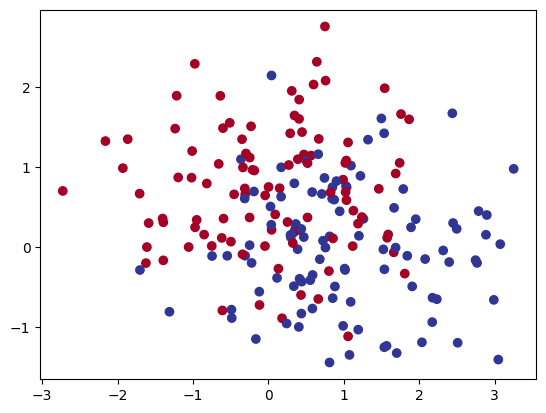

In [430]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [427]:
import pandas as pd

df = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
df

,X1,X2,label
0,-1.106897,0.042293,0
1,0.956800,0.456750,0
2,0.733516,0.584617,0
3,1.111407,-0.309214,1
4,0.209082,0.000657,1
...,...,...,...
195,-0.058311,0.228059,1
196,0.737210,0.320761,0
197,-1.475982,0.357239,0
198,1.883321,-0.109890,1
